<a href="https://colab.research.google.com/github/LuFernandez/PASA/blob/master/maxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtrado óptimo

Procesamiento Adaptativo de Señales Aleatorias
© 2018 Marc S. Ressl

In [0]:
!pip install soundfile

In [0]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import wavfile
import soundfile as sf
from scipy import signal

In [0]:
##Ordenes para probar el filtro
Ms = [i for i in range(1,11)]
Ms = np.concatenate((Ms,[10*i for i in range(2,11)]))
Ms = np.concatenate((Ms,[100*i for i in range(2,11)]))
Ms = np.concatenate((Ms,[1000*i for i in range(2,7)]))

##Defino un diccionario con los nombres de archivos de entrada y deseada para cada señal, junto con la diferencia de tiempo para sincronizar
signals = {'lin':['./sin_lin_sweep_5s.wav','./RTA lin sweep_06.wav',1],
          'log':['./sin_log_sweep_5s.wav','./RTA sin_log_sweep_02.wav',1.15],
          'square':['./square_100Hz_5s.wav','./RTA square_03.wav',1],
          'noise':['./noise_5s.wav','./RTA noise_04.wav',1]}
          #'music':['./09 You\'re Invited (But Your Friend Can\'t Come).wav','./Audio 02_01.wav',1]}

In [0]:
def readSignals(file_u,file_d):
    data_u, fs = sf.read(file_u)
    data_d, fs2 = sf.read(file_d)
    if(fs2 != fs):
        print('WARNING fs NOT EQUAL')
    return fs, data_u, data_d

def adjustSignals(fs,u,d,deltaT):
    ##Agrego ceros si alguna señal tiene diferente tamaño
    diff = len(u) - len(d)
    if(diff > 0):
        d = np.concatenate((d,[0 for _ in range(diff)]))
    elif(diff < 0):
        u = np.concatenate((u,[0 for _ in range(-diff)]))
    
    ##Agrego un segundo de ceros al principio y al final
    uZ = np.array([0 for i in range(0,1*fs)])
    uZ = np.concatenate((uZ,u))
    uZ = np.concatenate((uZ,[0 for i in range(0,1*fs)]))

    dZ = np.array([0 for i in range(0,1*fs)])
    dZ = np.concatenate((dZ,d))
    dZ = np.concatenate((dZ,[0 for i in range(0,1*fs)]))
    return uZ,dZ

def estimateParams(u,d):
    u_f = np.fft.fft(u)
    d_f = np.fft.fft(d)
    
    ##Estimo la autocorrelación
    #r = np.correlate(u,u,mode='same')
    print("Calculando R...")
    r = np.fft.ifft(u_f * u_f.conj()).real
    r = r[:len(u)//2]/len(u)

    ##Estimo la correlación cruzada
    #p = np.correlate(u,d,mode='same')
    print("Calculando P...")
    p = np.fft.ifft(u_f * d_f.conj()).real
    p = p[len(u)//2:]/len(u)
    p = np.flip(p)

    ##Energía de la señal deseada
    sigma2d = np.var(d)
    return r,p,sigma2d

def calc_optimum_filter(sigma2, R, p):
    '''
    Calcula el filtro Wiener óptimo
    sigma2: energía de la señal de entrada
    R: matriz de autocorrelación
    p: vector de correlación cruzada
    '''
    wo = np.dot(linalg.inv(R), p)
    Jmin = sigma2 - p.dot(wo)
    return (wo, Jmin)

def getFilter(fs,r,p,u):
    Jmin = np.zeros(len(Ms))
    for i,M in enumerate(Ms):
        print("Calculando filtro de orden",M)
        R = linalg.toeplitz(r[0:M])
        wo, Jmin[i] = calc_optimum_filter(sigma2d, R, p[0:M])
    return wo,Jmin

# function to keep the data within integer limits, and write to wavfile:
def write_wavfile(filename,fs,data):
    d = np.int16(data/np.max(np.abs(data)) * 32767 * 0.9)
    wavfile.write(filename,int(fs), d)

Calculando para lin


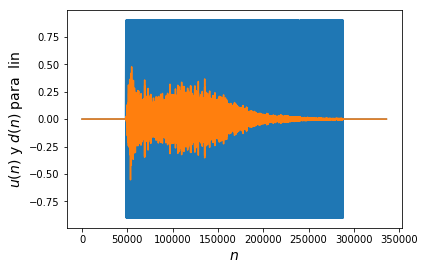

Calculando R...
Calculando P...


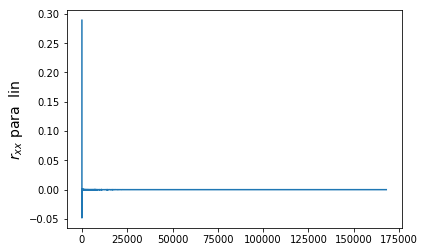

Calculando filtro de orden 1
Calculando filtro de orden 2
Calculando filtro de orden 3
Calculando filtro de orden 4
Calculando filtro de orden 5
Calculando filtro de orden 6
Calculando filtro de orden 7
Calculando filtro de orden 8
Calculando filtro de orden 9
Calculando filtro de orden 10
Calculando filtro de orden 20
Calculando filtro de orden 30
Calculando filtro de orden 40
Calculando filtro de orden 50
Calculando filtro de orden 60
Calculando filtro de orden 70
Calculando filtro de orden 80
Calculando filtro de orden 90
Calculando filtro de orden 100
Calculando filtro de orden 200
Calculando filtro de orden 300
Calculando filtro de orden 400
Calculando filtro de orden 500
Calculando filtro de orden 600
Calculando filtro de orden 700
Calculando filtro de orden 800
Calculando filtro de orden 900
Calculando filtro de orden 1000
Calculando filtro de orden 2000
Calculando filtro de orden 3000
Calculando filtro de orden 4000
Calculando filtro de orden 5000
Calculando filtro de orden 600

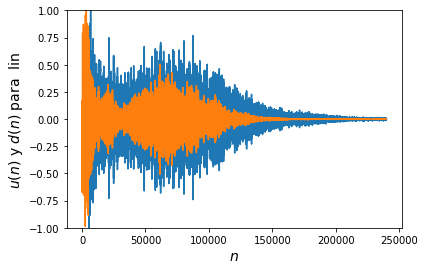

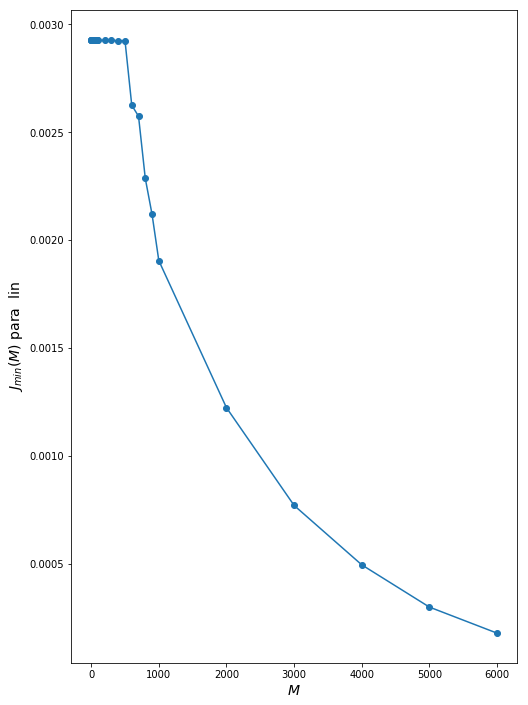

El valor de e es:  0.06114325064085553


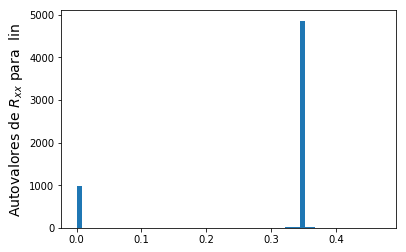

Calculando para log


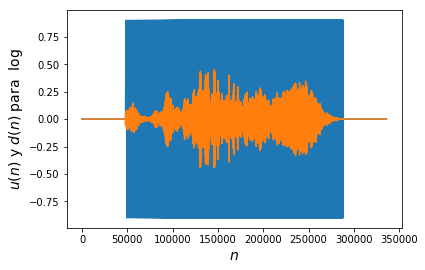

Calculando R...
Calculando P...


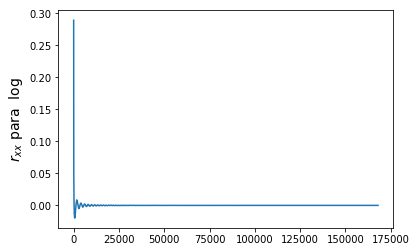

Calculando filtro de orden 1
Calculando filtro de orden 2
Calculando filtro de orden 3
Calculando filtro de orden 4
Calculando filtro de orden 5
Calculando filtro de orden 6
Calculando filtro de orden 7
Calculando filtro de orden 8
Calculando filtro de orden 9
Calculando filtro de orden 10
Calculando filtro de orden 20
Calculando filtro de orden 30
Calculando filtro de orden 40
Calculando filtro de orden 50
Calculando filtro de orden 60
Calculando filtro de orden 70
Calculando filtro de orden 80
Calculando filtro de orden 90
Calculando filtro de orden 100
Calculando filtro de orden 200
Calculando filtro de orden 300
Calculando filtro de orden 400
Calculando filtro de orden 500
Calculando filtro de orden 600
Calculando filtro de orden 700
Calculando filtro de orden 800
Calculando filtro de orden 900
Calculando filtro de orden 1000
Calculando filtro de orden 2000
Calculando filtro de orden 3000
Calculando filtro de orden 4000
Calculando filtro de orden 5000
Calculando filtro de orden 600

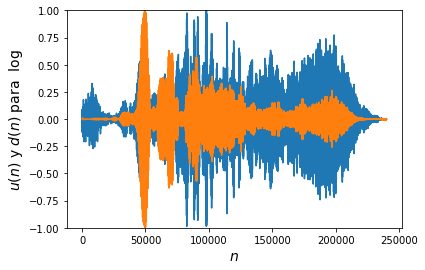

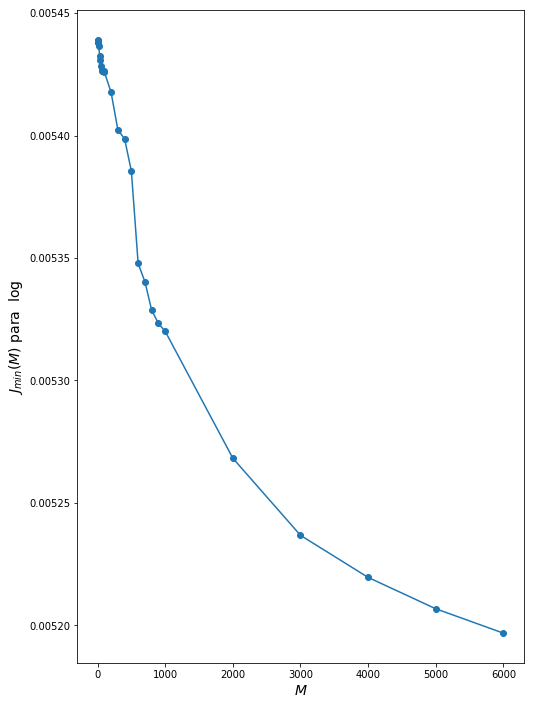

El valor de e es:  0.9550174359667044


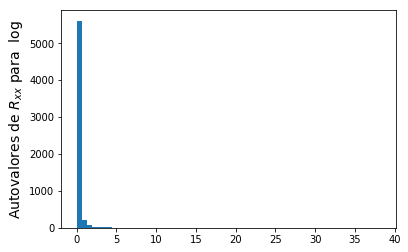

Calculando para square


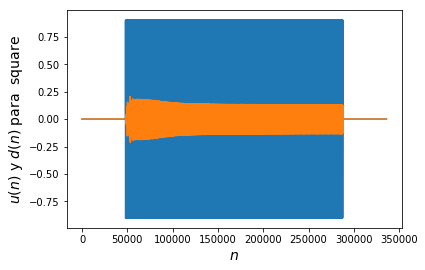

Calculando R...
Calculando P...


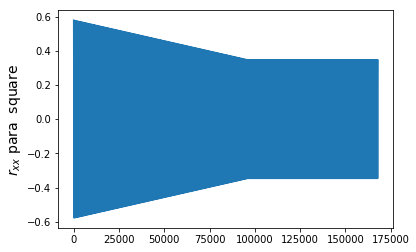

Calculando filtro de orden 1
Calculando filtro de orden 2
Calculando filtro de orden 3
Calculando filtro de orden 4
Calculando filtro de orden 5
Calculando filtro de orden 6
Calculando filtro de orden 7
Calculando filtro de orden 8
Calculando filtro de orden 9
Calculando filtro de orden 10
Calculando filtro de orden 20
Calculando filtro de orden 30
Calculando filtro de orden 40
Calculando filtro de orden 50
Calculando filtro de orden 60
Calculando filtro de orden 70
Calculando filtro de orden 80
Calculando filtro de orden 90
Calculando filtro de orden 100
Calculando filtro de orden 200
Calculando filtro de orden 300
Calculando filtro de orden 400
Calculando filtro de orden 500
Calculando filtro de orden 600
Calculando filtro de orden 700
Calculando filtro de orden 800
Calculando filtro de orden 900
Calculando filtro de orden 1000
Calculando filtro de orden 2000
Calculando filtro de orden 3000
Calculando filtro de orden 4000
Calculando filtro de orden 5000
Calculando filtro de orden 600

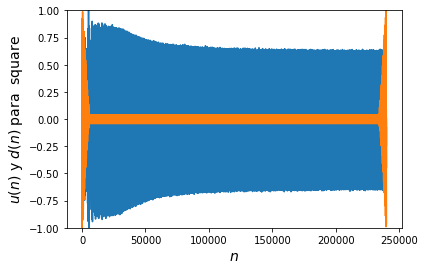

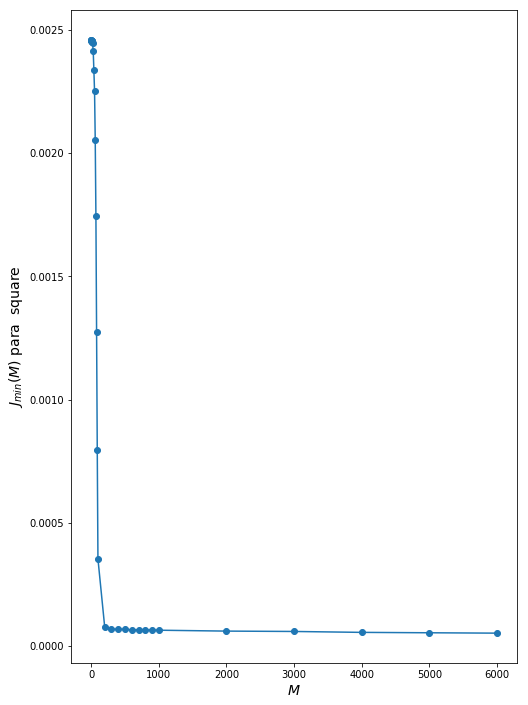

El valor de e es:  0.01859801008313726


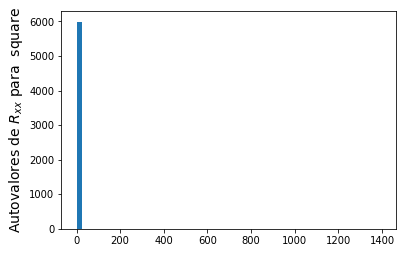

Calculando para noise


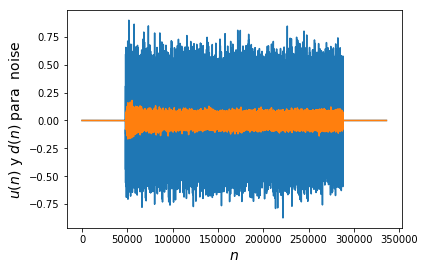

Calculando R...
Calculando P...


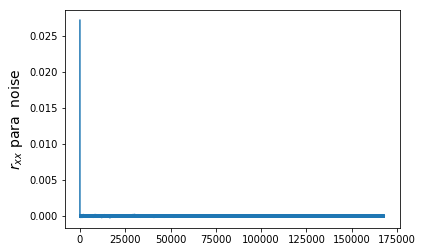

Calculando filtro de orden 1
Calculando filtro de orden 2
Calculando filtro de orden 3
Calculando filtro de orden 4
Calculando filtro de orden 5
Calculando filtro de orden 6
Calculando filtro de orden 7
Calculando filtro de orden 8
Calculando filtro de orden 9
Calculando filtro de orden 10
Calculando filtro de orden 20
Calculando filtro de orden 30
Calculando filtro de orden 40
Calculando filtro de orden 50
Calculando filtro de orden 60
Calculando filtro de orden 70
Calculando filtro de orden 80
Calculando filtro de orden 90
Calculando filtro de orden 100
Calculando filtro de orden 200
Calculando filtro de orden 300
Calculando filtro de orden 400
Calculando filtro de orden 500
Calculando filtro de orden 600
Calculando filtro de orden 700
Calculando filtro de orden 800
Calculando filtro de orden 900
Calculando filtro de orden 1000
Calculando filtro de orden 2000
Calculando filtro de orden 3000
Calculando filtro de orden 4000
Calculando filtro de orden 5000
Calculando filtro de orden 600

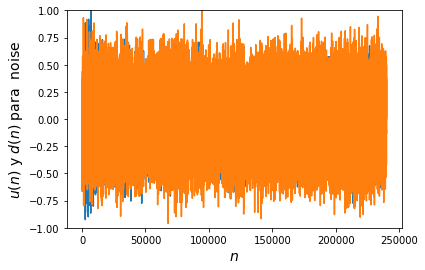

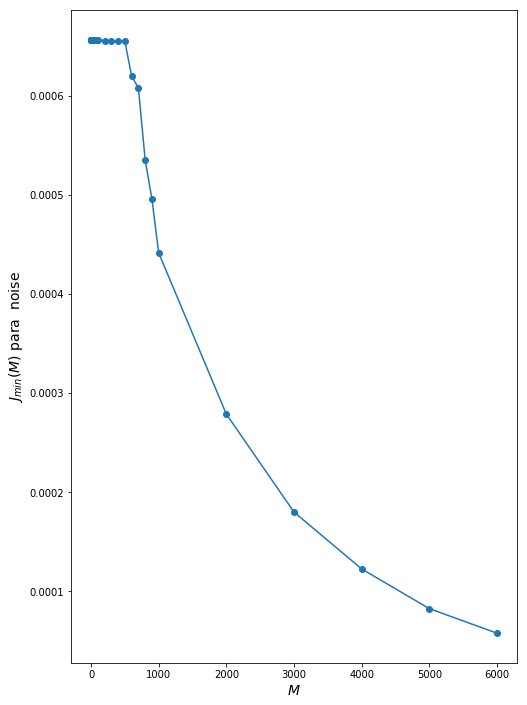

El valor de e es:  0.08833814631671025


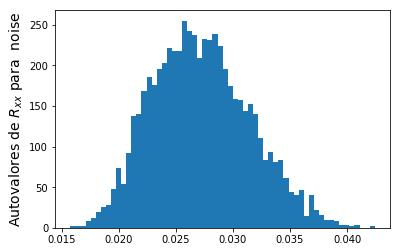

In [0]:
plotting = True
durEv = 5
for x in signals:
    print("Calculando para",x)
    ##Leo los datos de entrada (señal deseada y de entrada)
    fs,u,d = readSignals(signals[x][0],signals[x][1])

    ##Tomo solamente la parte del evento
    u = u[int(1*fs):int((1+durEv)*fs)]
    d = d[int((1+signals[x][2])*fs):int((1+durEv+signals[x][2])*fs)]

    ##Ajusto las señales
    uZ,dZ = adjustSignals(fs,u,d,signals[x][2])
    if plotting:
        plt.plot(uZ)
        plt.plot(dZ)
        plt.xlabel('$n$', fontsize=14)
        plt.ylabel('$u(n)$ y $d(n)$ para  ' + x, fontsize=14)
        plt.show()

    ##Estimo la autocorrelacion y correlacion cruzada para calcular el filtro
    r,p,sigma2d = estimateParams(uZ,dZ)
    if plotting:
        plt.plot(r)
        plt.ylabel('$r_{xx}$ para  ' + x, fontsize=14)
        plt.show()

    ##Calculo el filtro para cada orden
    wo,Jmin = getFilter(fs,r,p,u)

    ##Grafico la salida del filtro y la comparo con la deseada
    y = signal.filtfilt(wo,[1],u)
    d = d/max(d)
    y = y/max(y)
    if plotting:
        plt.figure()
        plt.plot(d)
        plt.plot(y)
        plt.ylim(-1,1)
        plt.xlabel('$n$', fontsize=14)
        plt.ylabel('$u(n)$ y $d(n)$ para  ' + x, fontsize=14)
        plt.show()

    ##Grafico de Jmin en función de M
    plt.figure(figsize=(8, 12))
    plt.plot(Ms,Jmin, marker='o')
    plt.xlabel('$M$', fontsize=14)
    plt.ylabel('$J_{min}(M)$ para  ' + x, fontsize=14)
    plt.show()

    #Orden optimo
    Mopt = Ms[len(Ms)-1]
    ##Calculamos e para el M optimo
    e = Jmin[len(Ms)-1]/sigma2d
    print("El valor de e es: ",e)

    ##Autovalores de la matriz de autocorrelación
    R = linalg.toeplitz(r[0:Mopt])
    aval = linalg.eigvalsh(R)

    ##Estimacion de la densidad de probabilidad
    plt.figure()
    plt.hist(aval, bins=60)
    plt.ylabel('Autovalores de $R_{xx}$ para  ' + x, fontsize=14)
    plt.show()

    # Escuchamos la salida del filtro
    file = "FILT" + signals[x][1][5:]
    write_wavfile(file,int(fs), y)

#Comentarios
En primer lugar, con las muestras de audio de $1$ segundo no se tiene demasiadas muestras y se pudo observar que la salida obtenida del filtro tiene un transitorio demasiado alto y largo. Por esta razón se usan $5$ segundos por muestra de audio y además se añaden un segundo de silencio al comienzo y al final de cada grabación para mitigar el posible ruido que aparece al estimar la autocorrelación.


Para estimar la autocorrelación y la correlación cruzada, necesarias para el cálculo del filtro de Wiener, se intentó en primer lugar hacerlo con la función correlate. Sin embargo, estó resultó demasiado lento por lo que se optó hacerlo a travéz de la IFFT de una estimación del espectro de potencia. Se pudo corroborar que los resultados obtenidos en cada caso eran acordes y además el método propuesto tarda mucho menos tiempo.


El orden óptimo se toma cuando no se observó una mejora significativa en el $J_{min}$. Se verificó además para elejir el valor cuando la autocorrelación se mete por debajo de un piso de ruido de $60dB$. Además, es conveniente tomar un orden no demasiado alto ya que al requerir el algortimo una inversión matricial, lo cual tiene complejidad cúbica, el tiempo de cálculo se volvía demasiado. Considerando las dos cosas mencionadas con anterioridad se toma entonces como orden máximo y óptimo $M=6000$


En algunos casos la salida filtrada no concuerda con la deseada, como se puede observar en los gráficos. Además la amplitud obtenida en la salida del filtro para esos casos es mucho menor que la deseada. En los gráficos ambas señales están normalizadas para poder observar las similitudes entre ambas. Esta diferencia notable de amplitud contribuye a que la energía de la señal estimada sea mucho menor que la deseada, lo cual explica los altos valores obtenidos para $e$. Esto se puede observar en el caso del sweep logarítmico, donde la señal filtrada comienza con unos picos demasiados altos pero tiende a la deseada hacia el final de la grabación. También se observan discrepancias en el caso de la señal cuadrada donde hay picos muy altos al comienzo y al final. Esto podría deberse a un posible transitorio en la autocorrelación (al principio y al final) que hacen que aparezcan estos picos no deseados en la señal filtrada. En el resto de la señal sin embargo, si son similares.


Por otro lado, para el caso del ruido blanco y el sweep lineal, el filtro pudo estimar satisfactoriamente la respuesta del cuarto, obteniéndose señales semejantes y un bajo valor de $e$. Además, en estos dos últimos casos el gráfico de $J_{min}$ es muy similar, llegando a valores parecidos para el orden seleccionado así como también valores similares para $e$. Se toman por lo tanto estos filtros como los que mejor estiman la respuesta deseada.


Finalmente se escuchan las señales obtenidas a la salida del filtro en cada caso y se la compara con la respuesta deseada. Para los casos donde aparecen picos indeseados, estos son notables en la grabación, pero el resto de la señal se escucha parecido. En los cosas donde el filtro fue exitoso, las grabaciones resultan similares a las deseadas.